# Employee Turnover
 Libraray used: Scikit-Learn, Pandas, Numpy, Matplotlib, Seaborn\
 Models used: Logistic Regression, Random Forest, Support Vector Machine, Decision Tree 

* Objective: To understand what factors contribute most to employee turnover and create a model that can predict if a certain employee will leave the company or not.


## Obtaining Data

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('turnover.csv')

print("\n Sample data: ")
df.head()




 Sample data: 


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Scrubbing Data

In [2]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [3]:
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [4]:
# Move the reponse variable "turnover" to the front of the table
front = df['turnover']

# drop(colume name list , axis: 0  for index 1 for columns, inplace means permanent change)
df.drop(labels=['turnover'], axis=1,inplace = True)

# insert( insert column location, column to be inserted , values)
df.insert(0, 'turnover', front)

df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


Our data is pretty clean, no missing values

## Exploring Data

### Statistical Overview

In [5]:
df.shape

(14999, 10)

In [6]:
df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

In [7]:
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [8]:
# Counting people who left
df['turnover'].value_counts()

0    11428
1     3571
Name: turnover, dtype: int64

In [9]:
turnover_rate = df.turnover.value_counts() / 14999
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [10]:
df.groupby('turnover').mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Observations:
1. The dataset has about 15,000 employee observations and 10 features
    1. The company had a turnover rate of about 24%
    2. Mean satisfaction of employees is 0.61
2. Average satisfaction level of person who stayed with the company is higher than those who left
3. Average monthly hours of people who left is more than those who stayed
4. Promoted in last 5 years employess more likely to stay


### Correlation Matrix & Heatmap

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


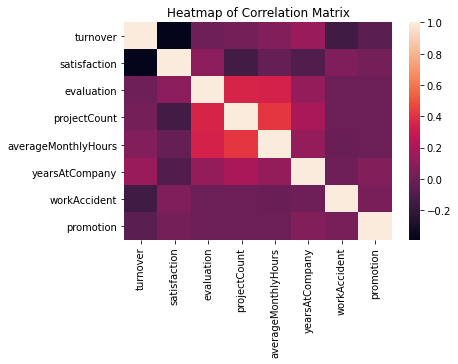

In [11]:
import seaborn as sns
#Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

Moderate Positively Correlated Features:

* projectCount vs evaluation: 0.349333

* projectCount vs averageMonthlyHours: 0.417211
  
* averageMonthlyHours vs evaluation: 0.339742
  
Moderate Negatively Correlated Feature:

* satisfaction vs turnover: -0.388375

Summary:

From the heatmap, there is a positive(+) correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly.

For the negative(-) relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied.

### Distribution Plots (Satisfaction - Evaluation - AverageMonthlyHours)

Text(0.5, 0.98, 'For all Employees')

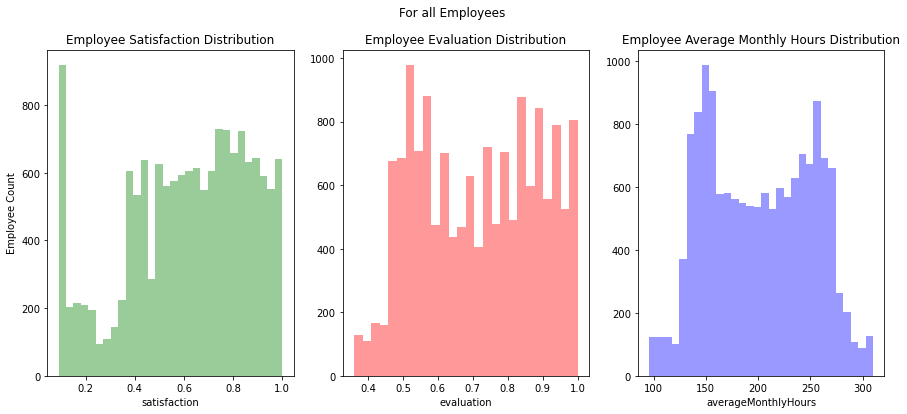

In [12]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')


# Graph Employee Average Monthly Hours
sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')


f.suptitle('For all Employees')

Text(0.5, 0.98, 'For Current Employees')

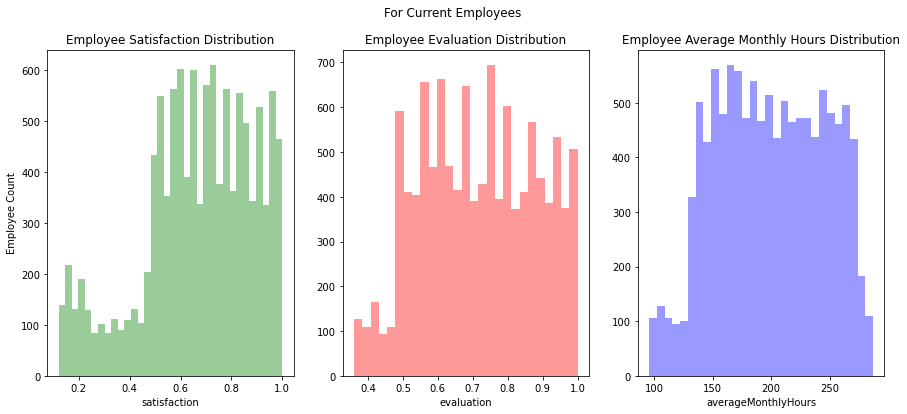

In [13]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

df_stay = df[ df['turnover']== 0 ]  
# Graph Employee Satisfaction
sns.distplot(df_stay.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(df_stay.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')


# Graph Employee Average Monthly Hours
sns.distplot(df_stay.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')

f.suptitle('For Current Employees')

Text(0.5, 0.98, 'For Former Employees')

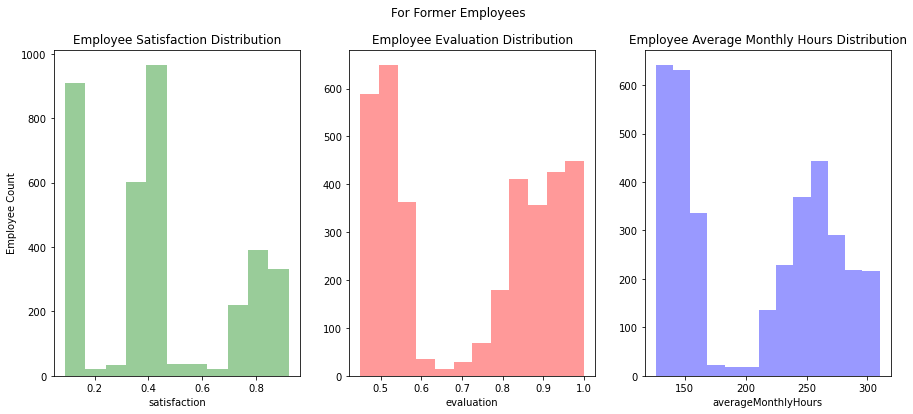

In [14]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

df_stay = df[ df['turnover']== 1 ]  
# Graph Employee Satisfaction
sns.distplot(df_stay.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(df_stay.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')


# Graph Employee Average Monthly Hours
sns.distplot(df_stay.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')

f.suptitle('For Former Employees')

Summary:

* Satisfaction
    - There is a huge spike for employees with low satisfaction and high satisfaction
        - Further analysis shows low satisfaction employess tend to leave
        - And high satisfaction employees tend to stay
 
* Evaluation
  - There is a bimodal distrubtion of employees for low evaluations (less than 0.6) and high evaluations (more than 0.8)
      - Former employees dist plot shows employees with low evaluations and high evaluations tends to leave 
 
* AverageMonthlyHours 
  - There is another bimodal distribution of employees with lower and higher average monthly hours (less than 150 hours & more than 250 hours)
 
* The evaluation and average monthly hour graphs both share a similar distribution.
 
* Employees with lower average monthly hours were evaluated less and vice versa


### Salary V.S. Turnover

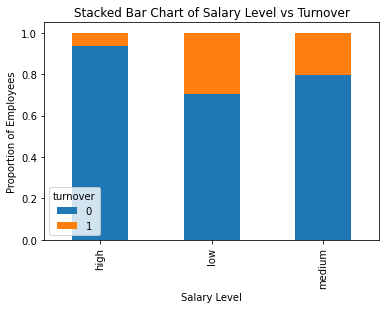

In [15]:
table=pd.crosstab(df.salary, df.turnover)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

Summary:

Majority of employees who left either had low or medium salary.

Barely any employees left with high salary

Employees with low to average salaries tend to leave the company.

### Department V.S. Turnover

In [16]:
df.groupby('department').mean()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
department,,,,,,,,
IT,0.222494,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.002445
RandD,0.153748,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.034307
accounting,0.265971,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.018253
hr,0.290934,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.020298
management,0.144444,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.109524
marketing,0.236597,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.050117
product_mng,0.219512,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.000000
sales,0.244928,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.024155
support,0.248991,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.008973


Text(0.5, 0, 'Frequency of Turnover')

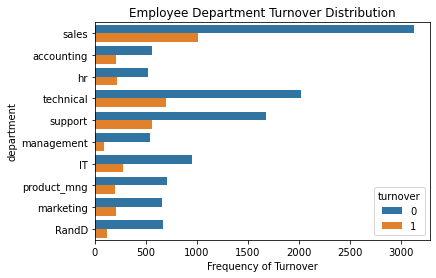

In [17]:
f, ax = plt.subplots()
sns.countplot(y="department", hue='turnover', data=df).set_title('Employee Department Turnover Distribution');
ax.set_xlabel('Frequency of Turnover')

Summary:

The sales, technical, and support department were the top 3 departments to have employee turnover.

The management department had the smallest amount of turnover


### Turnover V.S. ProjectCount

[Text(0, 0.5, 'Percent')]

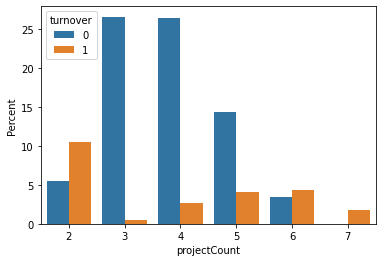

In [18]:
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")


Summary:

More than half of the employees with 2,6, and 7 projects left the company

Majority of the employees who did not leave the company had 3,4, and 5 projects

All of the employees with 7 projects left the company

There is an increase in employee turnover rate as project count increases

### Turnover V.S. Evaluation

Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

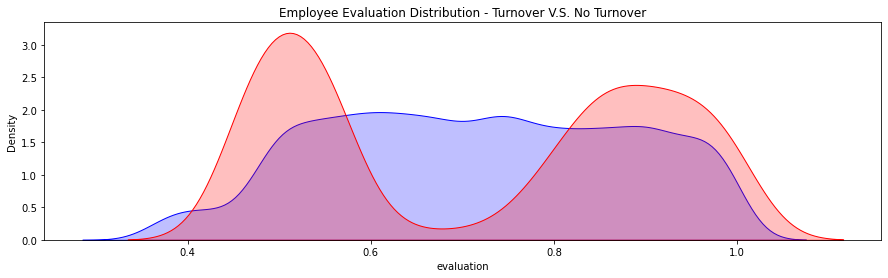

In [19]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

Summary:

There is a biomodal distribution for those left.

Employees with low performance/evaluation tend to leave the company more

Employees with high performance/evaluation tend to leave the company more

The safe spot for employees that stayed is within 0.6-0.8 evaluation

###  Turnover V.S. AverageMonthlyHours

Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

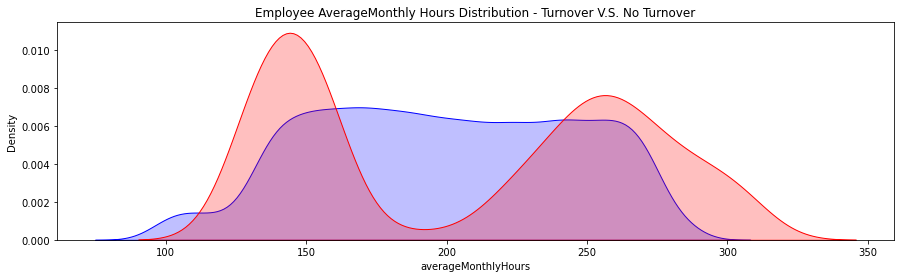

In [20]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')


Summary:

Another bi-modal distribution for employees that turnovered

Employees who had ~150hours or less hours of work left the company more

Employees who had ~250 or more hours of work left the company

Employees who left generally were underworked or overworked.

### Turnover V.S. Satisfaction

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

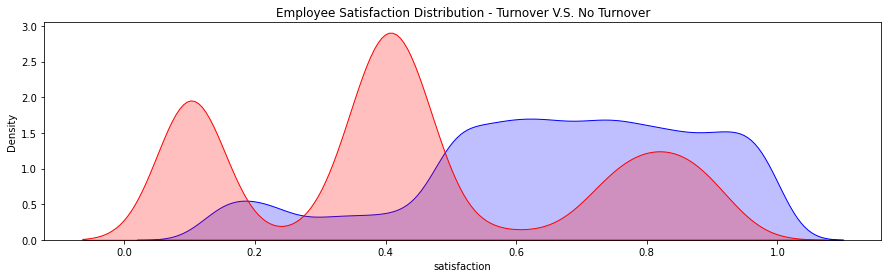

In [21]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')


Summary:

There is a tri-modal distribution for employees that turnovered

Employees who had really low satisfaction levels (0.2 or less) left the company more

Employees who had low satisfaction levels (0.3~0.5) left the company more

Employees who had really high satisfaction levels (0.7 or more) left the company more


### ProjectCount VS AverageMonthlyHours

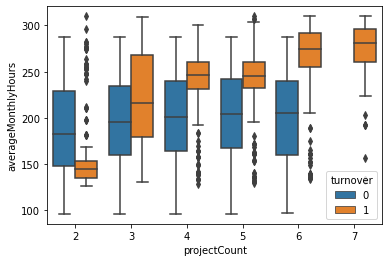

In [22]:
#ProjectCount VS AverageMonthlyHours [BOXPLOT]

import seaborn as sns
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=df)


Summary:

As project count increased, so did average monthly hours

Something weird about the boxplot graph is the difference in averageMonthlyHours between people who had a turnver and did not.

Looks like the average employees who stayed worked about 200hours/month. Those that had a turnover worked about 250hours/month


Looks like employees who did not have a turnover had consistent averageMonthlyHours, despite the increase in projects

In contrast, employees who did have a turnover had an increase in averageMonthlyHours with the increase in projects

### ProjectCount VS Evaluation

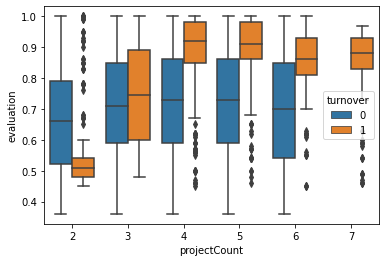

In [23]:
#ProjectCount VS Evaluation
import seaborn as sns
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=df)

Summary:

Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts

There is a huge skew in employees who had a turnover though. It drastically changes after 3 projectCounts. 

Employees that had two projects and a horrible evaluation left. 

Employees with more than 3 projects and super high evaluations left


### Satisfaction VS Evaluation

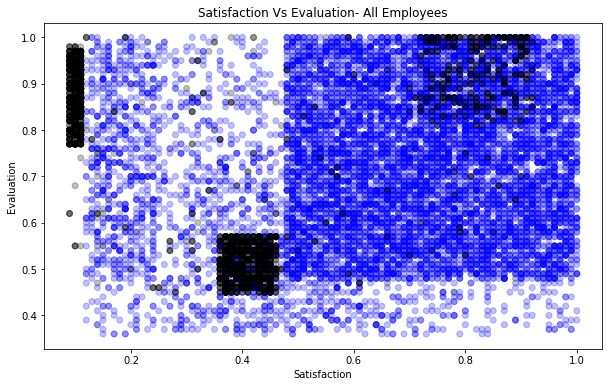

In [24]:
colors = ['blue' if c == 0 else 'black' for c in df.turnover]
fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df, color=colors,alpha=0.25)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.title("Satisfaction Vs Evaluation- All Employees")
plt.show()

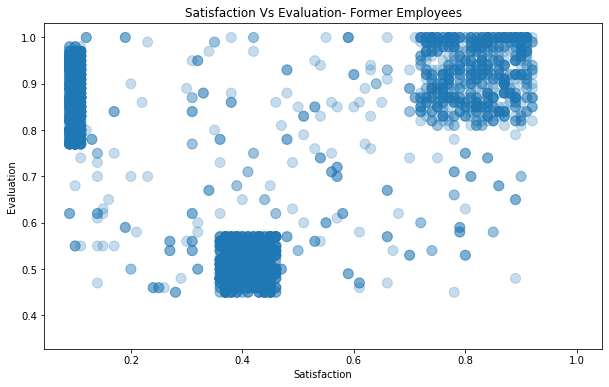

In [25]:
size=df.turnover*100
fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df,alpha=0.25,
             s=size)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.title("Satisfaction Vs Evaluation- Former Employees")
plt.show()

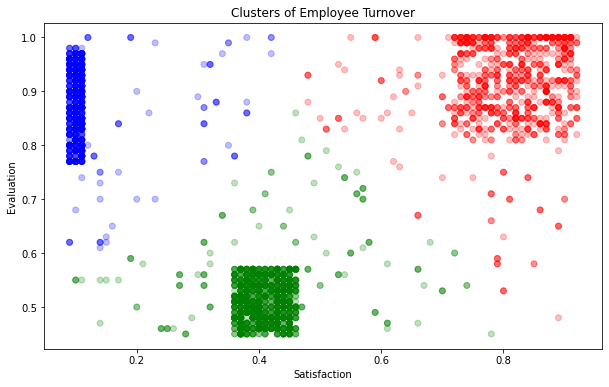

In [26]:
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover

kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.title("Clusters of Employee Turnover")
plt.show()

Summary:

We can observe 3 types of clusters for employees who left

1. Hard-working and sad / Overworked Employee:

    * Satisfaction: 0 - 0.2       
    * Evaluation: 0.75 - 1.0\
    * Good Worker but felt horrible at job
    
2. Bad and sad / underperformed Employee:

    * Satisfaction: 0.35 - 0.45    
    * Evaluation: 0.43 - 0.58   
    * Badly evaluated worker may felt bad at work

3. Hard-working and Happy / Outstanding Employee:

    * Satisfaction: 0.7 - 1.0      
    * Evaluation: 0.8 - 1.0\  
    * Ideal worker, found another job opportunity

### Turnover V.S. YearsAtCompany

[Text(0, 0.5, 'Percent')]

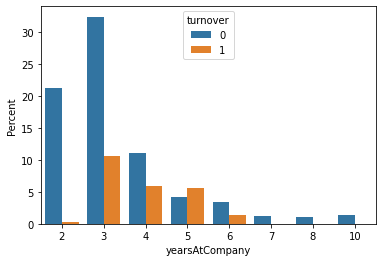

In [27]:
ax = sns.barplot(x="yearsAtCompany", y="yearsAtCompany", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Summary:

Employees most likely to stay after 6 years or under 2 year in company

Employees most likely to leave between 3-5 year range in company

More than half of the employees with 4 and 5 years left the company

Employees with 5 years should highly be looked into

## Modeling the Data

### Converting categorical variables to dummy variable

In [78]:
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve


# Create dummy variables for the 'department' and 'salary' features, since they are categorical 
department = pd.get_dummies(data=df['department'],prefix='dep') #drop first column to avoid dummy trap
salary = pd.get_dummies(data=df['salary'],prefix='sal')

df1 = pd.concat( [df.drop(['department','salary'],axis=1), department, salary], axis=1 )
df1.columns.values

array(['turnover', 'satisfaction', 'evaluation', 'projectCount',
       'averageMonthlyHours', 'yearsAtCompany', 'workAccident',
       'promotion', 'dep_IT', 'dep_RandD', 'dep_accounting', 'dep_hr',
       'dep_management', 'dep_marketing', 'dep_product_mng', 'dep_sales',
       'dep_support', 'dep_technical', 'sal_high', 'sal_low',
       'sal_medium'], dtype=object)

In [80]:
df.columns.values

array(['turnover', 'satisfaction', 'evaluation', 'projectCount',
       'averageMonthlyHours', 'yearsAtCompany', 'workAccident',
       'promotion', 'department', 'salary'], dtype=object)

### Splitting the dataset

In [81]:
df1_cols=df1.columns.values.tolist()
y=['turnover']
X=[i for i in df1_cols if i not in y]
print(X)

['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours', 'yearsAtCompany', 'workAccident', 'promotion', 'dep_IT', 'dep_RandD', 'dep_accounting', 'dep_hr', 'dep_management', 'dep_marketing', 'dep_product_mng', 'dep_sales', 'dep_support', 'dep_technical', 'sal_high', 'sal_low', 'sal_medium']


In [82]:
X=df1[X]
X.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,dep_IT,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical,sal_high,sal_low,sal_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [83]:
y=df1[y]
y.head()

,turnover
0,1
1,1
2,1
3,1
4,1


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Accuracy of models

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

RF = RandomForestClassifier()
LR = LogisticRegression(solver='liblinear')
SV = SVC(kernel="linear")
DT = DecisionTreeClassifier()

In [86]:
logreg = LR
logreg.fit(X_train, y_train.values.ravel())
print('\n Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))


 Logistic regression accuracy: 0.786


In [87]:
dt = DT
dt.fit(X_train, y_train.values.ravel())
print('\n Decision Tree Classifier : {:.3f}'.format(accuracy_score(y_test, dt.predict(X_test))))


 Decision Tree Classifier : 0.981


In [88]:

rf = RF
rf.fit(X_train, y_train.values.ravel())

print('\n Random Forest Classifier : ',accuracy_score(y_test, rf.predict(X_test)))


 Random Forest Classifier :  0.9906666666666667


In [89]:
svc = SVC(probability=True)
svc.fit(X_train, y_train.values.ravel())
print('\n Support vector machine : {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))


 Support vector machine : 0.788


### The ROC Curve

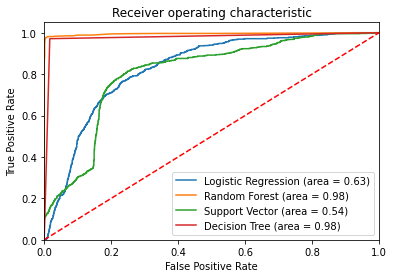

In [90]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

dt_roc_auc = roc_auc_score(y_test, dt.predict(X_test))
dt_fpr, dt_tpr,dt_thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

svc_roc_auc = roc_auc_score(y_test, svc.predict(X_test))
svc_fpr, svc_tpr,svc_thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(svc_fpr, svc_tpr, label='Support Vector (area = %0.2f)' % svc_roc_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

### Cross Validation

Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset.

#### Recursive Feature Elimination
The Recursive Feature Elimination (RFE) works by recursively removing features and building a model on those features that remain. In selecting the optimal number of features, the estimator is trained and the features are selected via the coefficients, or via the feature importances. The least important features are removed. This process is repeated recursively until the optimal number of features is obtained.

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import numpy as np

In [92]:
def pipe1(rfe,model):
    global X_train,y_train
    
    pipe = Pipeline([('Feature Selection', rfe), ('Model', model)])
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)
    n_scores = cross_val_score(pipe, X_train, y_train.values.ravel(), scoring='accuracy', cv=cv, n_jobs=-1)
    
    print('\n Cross validation average accuracy of',str(model),': ',np.mean(n_scores))
    
    pipe.fit(X_train,y_train.values.ravel())
    
    cols = rfe.get_support(indices=True)
    print('\n \n Columns: ',np.array(X_train.iloc[:,cols].columns))
    

* Pipeline — since we’ll perform some cross-validation. It’s best practice in order to avoid data leakage.
* RepeatedStratifiedKFold — for repeated stratified cross-validation.
    - The stratified K fold ensures that the number of samples from each class is well balanced in each fold. RepeatedStratifiedKFold repeats the stratified K fold the specified number of times, with a different randomization in each repetition.
* cv— the cross-validation splitting strategy.
* cross_val_score — for evaluating the score on cross-validation.


sklearn.feature_selection.RFE class takes the following parameters:
* estimator — a machine learning estimator that can provide features importances via the coef_ or feature_importances_ attributes.
* n_features_to_select — the number of features to select. Selects half if it's not specified.


RFE class attributes are:  
* ranking_ — the ranking of the features.
* n_features_ — the number of features that have been selected.
* support_ — an array that indicates whether or not a feature was selected.
* get_support - To get the support array as indices or boolean 

In [93]:
model = LR
rfe = RFE(model,10)
pipe1(rfe,model)


 Cross validation average accuracy of LogisticRegression(solver='liblinear') :  0.7669841202056148

 
 Columns:  ['satisfaction' 'evaluation' 'yearsAtCompany' 'workAccident' 'promotion'
 'dep_IT' 'dep_RandD' 'dep_management' 'sal_high' 'sal_low']


In [94]:
model = RF
rfe = RFE(model,10)
pipe1(rfe,model)


 Cross validation average accuracy of RandomForestClassifier() :  0.9902212257809411

 
 Columns:  ['satisfaction' 'evaluation' 'projectCount' 'averageMonthlyHours'
 'yearsAtCompany' 'workAccident' 'dep_sales' 'dep_technical' 'sal_high'
 'sal_low']


In [95]:
model = DT
rfe = RFE(model,10)
pipe1(rfe,model)


 Cross validation average accuracy of DecisionTreeClassifier() :  0.9767977382364572

 
 Columns:  ['satisfaction' 'evaluation' 'projectCount' 'averageMonthlyHours'
 'yearsAtCompany' 'dep_sales' 'dep_support' 'dep_technical' 'sal_low'
 'sal_medium']


Summary:
    * We have taken 10 n_features_to_select for each model
    * Highest accuracy is for Random forest followed by decision tree classifier and Logistic Regression 
    * All of the models have common important features like satisfaction, evaluation, years at company 
    

#### Automatic Feature Selection

Instead of mannualy configuring the number of features to select, sklearn.feature_selection.RFECV class automatically selects them. 

The important attribute it has is :
* grid_scores_ — the scores obtained from cross-validation.

There are four ways to check if the predictions are right or wrong:
1. TN / True Negative: the case was negative and predicted negative
2. TP / True Positive: the case was positive and predicted positive
3. FN / False Negative: the case was positive but predicted negative
4. FP / False Positive: the case was negative but predicted positive

We need to focus on 2 type of errors : 

* False Positives (Type I Error): predicted that the employee will leave, but do not

* False Negatives (Type II Error): predicted that the employee will not leave, but does leave

Classification Report: 
* Precision:- Accuracy of positive predictions.
   - Precision = TP/(TP + FP)

* Recall:- Fraction of positives that were correctly identified.
   - Recall = TP/(TP+FN)

* F1 score — Percent of positive predictions that were correct
   - F1 Score = 2*(Recall * Precision) / (Recall + Precision)

* Support is the number of actual occurrences of the class in the specified dataset.

In [96]:
from sklearn.feature_selection import RFECV

In [97]:
def classify(rfecv,model):
    global X_train,y_train
    
    print('For',str(model))
    pipeline = Pipeline([('Feature Selection', rfecv), ('Model', model)])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)
    
    n_scores = cross_val_score(pipeline, X_train, y_train.values.ravel(), scoring='accuracy', cv=cv, n_jobs=-1)
    print("\n Cross validation average accuracy: ",np.mean(n_scores))

    pipeline.fit(X_train,y_train.values.ravel())
    y_pred= pipeline.predict(X_test)
    
    roc_auc = roc_auc_score(y_test,y_pred) 
    print ("\n AUC = %2.2f" % roc_auc)
    
    print ("\n Classification Report:  ")
    print(classification_report(y_test, y_pred))
    
    print('\n Optimal number of features : %d' % rfecv.n_features_)
    
    cols = rfecv.get_support(indices=True)
    print('\n Columns: ',np.array(X_train.iloc[:,cols].columns))

    plt.figure(figsize=(12,6))
    plt.xlabel('Number of features selected')
    plt.ylabel('Cross validation score (nb of correct classifications)')
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()

For LogisticRegression(solver='liblinear')

 Cross validation average accuracy:  0.7921239224990115

 AUC = 0.64

 Classification Report:  
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2881
           1       0.57      0.37      0.45       869

    accuracy                           0.79      3750
   macro avg       0.70      0.64      0.66      3750
weighted avg       0.77      0.79      0.77      3750


 Optimal number of features : 13

 Columns:  ['satisfaction' 'evaluation' 'projectCount' 'yearsAtCompany'
 'workAccident' 'promotion' 'dep_IT' 'dep_RandD' 'dep_hr' 'dep_management'
 'sal_high' 'sal_low' 'sal_medium']


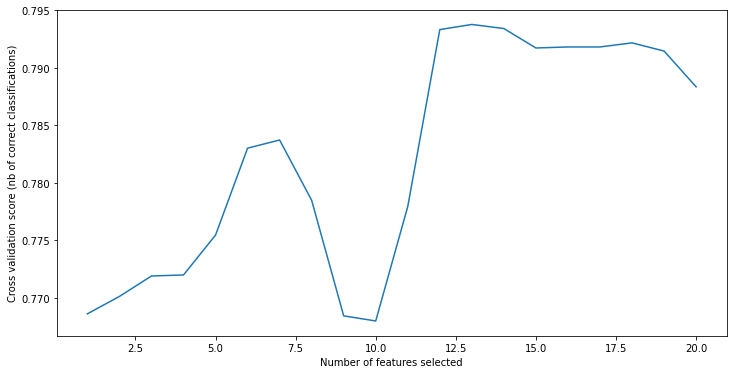

In [98]:
model = LR
rfecv = RFECV(model)
classify(rfecv,model)

In [99]:
def classifytree(rfecv,model):
    
    global X_train, y_train , X_test , y_test
    
    print('For',str(model))
    pipeline = Pipeline([
    ('Feature Selection', rfecv), 
    ('Model', model)
    ])

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)
    n_scores = cross_val_score(pipeline, X_train, y_train.values.ravel(), scoring='accuracy', cv=cv, n_jobs=-1)

    print("\n Cross validation average accuracy: ",np.mean(n_scores))
    
    pipeline.fit(X_train,y_train.values.ravel())
    y_pred= pipeline.predict(X_test)
    
     
    roc_auc = roc_auc_score(y_test,y_pred) 
    print ("\n AUC = %2.2f" % roc_auc)
    
    print ("\n Classification Report:  ")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(12,6))
    plt.xlabel('Number of features selected')
    plt.ylabel('Cross validation score (nb of correct classifications)')
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()

    cols = rfecv.get_support(indices=True)

    print('\n Optimal number of features : %d' % rfecv.n_features_)
    print('\n Columns: ',np.array(X_train.iloc[:,cols].columns))


    importances = model.feature_importances_
    feat_names = X_train.iloc[:,cols].columns


    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12,6))
    plt.title("Feature importances")
    plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
    plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
    plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
    plt.xlim([-1, len(indices)])
    plt.show()



    

For DecisionTreeClassifier()

 Cross validation average accuracy:  0.9770112613681298

 AUC = 0.98

 Classification Report:  
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2881
           1       0.94      0.98      0.96       869

    accuracy                           0.98      3750
   macro avg       0.97      0.98      0.97      3750
weighted avg       0.98      0.98      0.98      3750



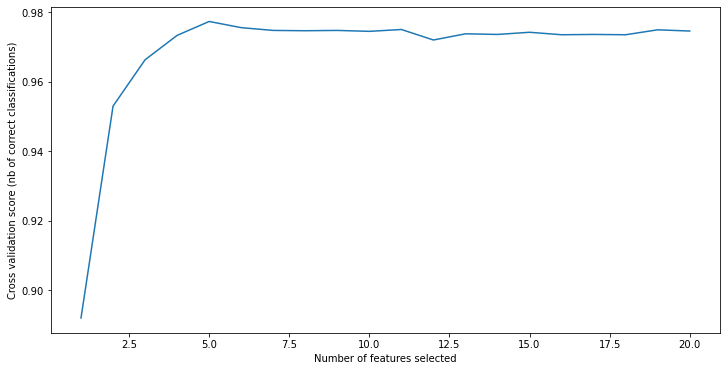


 Optimal number of features : 5

 Columns:  ['satisfaction' 'evaluation' 'projectCount' 'averageMonthlyHours'
 'yearsAtCompany']


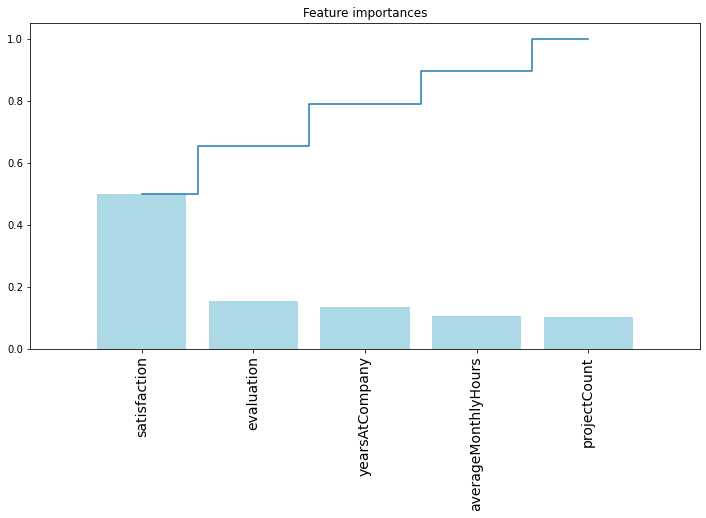

In [100]:
model = DT
rfecv = RFECV(model)
classifytree(rfecv,model)

For RandomForestClassifier()

 Cross validation average accuracy:  0.9904167971530249

 AUC = 0.99

 Classification Report:  
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2881
           1       0.99      0.98      0.98       869

    accuracy                           0.99      3750
   macro avg       0.99      0.99      0.99      3750
weighted avg       0.99      0.99      0.99      3750



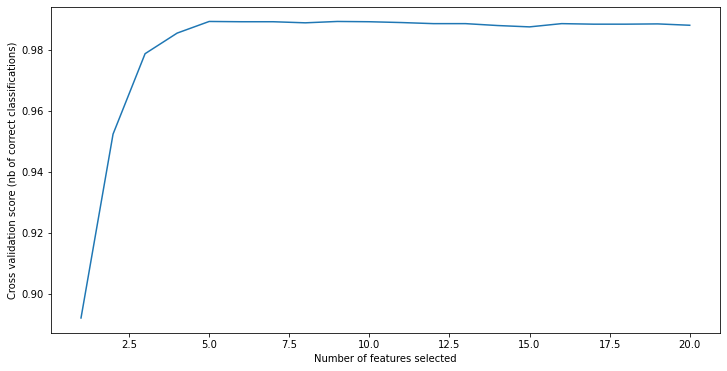


 Optimal number of features : 5

 Columns:  ['satisfaction' 'evaluation' 'projectCount' 'averageMonthlyHours'
 'yearsAtCompany']


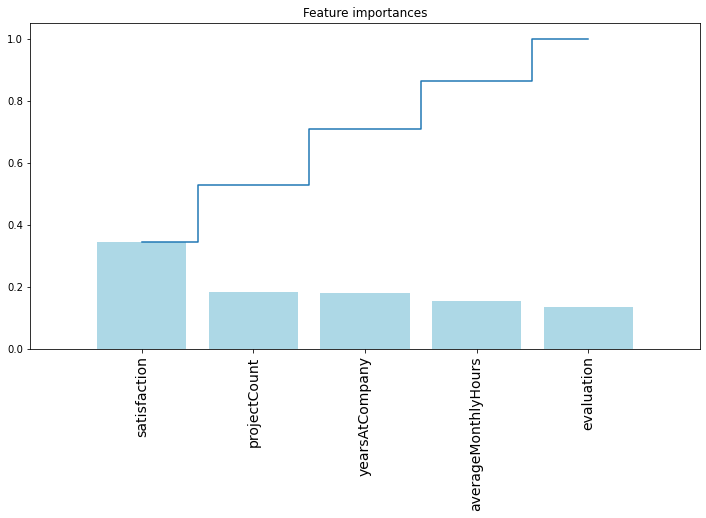

In [101]:
model = RF 
rfecv = RFECV(model)
classifytree(rfecv,model)

Summary:
* Here, we are more concerned with type 2 errors 
* We can see that Random Forest and Decision Tree model both have a great recall % which are far better than logistic regression
    - Both the models can correctly identify the employees that left
* The precision of random forest is more than that of decision tree
    - Random Forest model is more accurate about the employee leaving
    
* Both RF and DT model have same number of optimal features reequired but their importance is not the same 

## Interpreting the data

1. Employees generally leave when they are underworked ( less than 150 hr/month or 6 hr/day) [Work days in a month are about 25 ]
2. Employees generally left when they are overworked (more than 250hr/month or 10 hr/day )
3. Employees with either really high or low evaluations should be taken into consideration for high turnover rate
4. Employees with low to medium salaries are the bulk of employee turnover
5. Employees that had low (2) or  high(6 or 7) project count was at risk of leaving the company
6. Employee satisfaction is the highest indicator for employee turnover.
7. Employee that had 4 and 5 yearsAtCompany should be taken into consideration for high turnover rate
8. Employee satisfaction, yearsAtCompany, and evaluation were the three biggest factors in determining turnover.